## Logistic Regression

In [5]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 1000

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
# number of data points
m1 = 1000

# generate m gaussian distributed data points with
# mean and cov.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

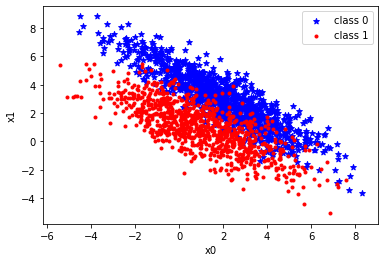

In [7]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

X = np.concatenate((r0,r1))
y = np.ones(len(r0)+len(r1))
y[:len(r0),] = 0




### Logistic Function

In [8]:
def logistic_function(x):
    """ Applies the logistic function to x, element-wise. 
    """
    return 1.0 / (1.0 + np.exp(-x))


Text(0.5, 1.0, 'Logistic function')

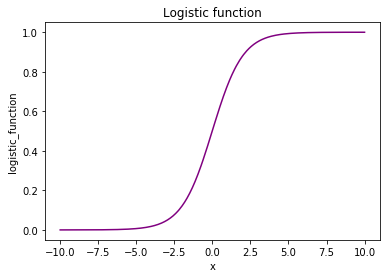

In [9]:
### plot the logistic function
x =np.sort(np.random.uniform(-10., 10., 1000))
log_f = logistic_function(x)
#print (x)
#print(log_f)
plt.plot(x, log_f, color='Purple',linestyle="-")
plt.xlabel("x")
plt.ylabel("logistic_function")
plt.title("Logistic function")

### Logistic Hypothesis
$$
h_\Theta(\vec x) = \sigma(\vec x'^T \cdot \vec \theta)
$$

In [10]:
#return new X with additional feature x0=1. for each example 
def create_new_X (x):
        x0 = np.ones((len(x[:,0]),1))
        return np.hstack((x0,x))

def logistic_hypothesis(theta):
    ''' Combines given list argument in a logistic equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a logistc function based on thetas and x

   ''' 

    
    
    return lambda x: logistic_function(create_new_X(x).dot(theta.T))

theta = np.array([1.,2.,3.])
h = logistic_hypothesis(theta)
print(h(X))

[0.9999998  0.99999819 0.99999993 ... 0.97053673 0.99934281 0.9994346 ]


### Cross-entropy

\begin{equation}
    \text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\vec \theta) = -y^{(i)} \cdot log(h_{\Theta} ({\vec x}^{(i)})) - (1-y^{(i)}) \cdot log(1-h_\Theta({\vec x}^{(i)}))
\end{equation}


In [11]:
def cross_entropy_costs(h, X, y):
    ''' Implements cross-entropy as a function costs(theta) on given traning data 
    
    Args:
        h: the hypothesis as function
        x: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        
    Returns:
        lambda costs(theta) that models the cross-entropy for each x^i
'''
    return lambda theta: -y * np.log(h(theta)(X)) - (1.0 - y) * np.log(1.0 - h(theta)(X))

theta = np.array([1.,2.,3.])
costs = cross_entropy_costs(logistic_hypothesis, X, y)
print(costs(theta))

[1.54499549e+01 1.32243823e+01 1.65277723e+01 ... 2.99060322e-02
 6.57407192e-04 5.65561823e-04]


### Loss Function

\begin{equation}
    J_{\mathcal D}(\vec \theta)=\frac{1}{m}\sum_{i=1}^{m}\left(\text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\Theta)\right)
\end{equation}


In [12]:

def mean_cross_entropy_costs(X, y, hypothesis, cost_func, lambda_reg=0.1):
    ''' Implements mean cross-entropy as a function J(theta) on given traning data 
    
    Args:
        X: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        hypothesis: the hypothesis as function
        cost_func: cost function
        
    Returns:
        lambda J(theta) that models the mean cross-entropy
   
    raise NotImplementedError("You should implement this")
     '''
    #print (len(y))
    #print (len(X))
    return lambda theta: (1.0/len(X)) * ((cost_func(hypothesis, X, y)(theta)).sum())


theta = np.array([1.,2.,3.])
J = mean_cross_entropy_costs(X,y, logistic_hypothesis, cross_entropy_costs, 0.1)
print(J(theta))

6.998385453616472


###  Gradient Descent

\begin{equation}
    \vec \theta_{new} \leftarrow \vec \theta_{{old}} - \alpha  \vec \nabla_\Theta J(\vec \theta_{old})
\end{equation}


In [13]:

    
def compute_new_theta(X, y, theta, learning_rate, hypothesis, lambda_reg=0.1):
    ''' Updates learnable parameters theta 

    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        hypothesis: the hypothesis as function
        
        
    Returns:
        theta: Updated theta_0
'''
    
    y_ = hypothesis(theta)(X)
    theta = theta - learning_rate * (1.0 / len(y)) * (create_new_X(X).T.dot(y_ - y)) 
    return theta
    
theta = np.array([1.,2.,3.])
theta = compute_new_theta(X, y, theta, .1, logistic_hypothesis, .1)
print(theta)

[0.95305461 1.90252988 2.84920667]


In [14]:
def gradient_descent(X, y, theta, learning_rate, num_iters, lambda_reg=0.1):
    ''' Minimize theta values of a logistic model based on cross-entropy cost function
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        num_iters: number of iterations updating thetas
        lambda_reg: regularization strength
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration    
'''
    history_cost = np.zeros(num_iters)
    history_theta = np.zeros((num_iters, len(theta)))
    theta_temp = theta

    
    for i in range(num_iters):
        history_theta[i] = theta_temp
        history_cost[i] = mean_cross_entropy_costs(X, y, logistic_hypothesis, cross_entropy_costs, lambda_reg)(theta_temp)
        theta_temp = compute_new_theta(X, y, theta_temp, learning_rate, logistic_hypothesis, lambda_reg)
       
    return history_cost, history_theta
  



   

### Training and Evaluation

In [15]:

# Assign sensible values
alpha = 0.01
#start_values_theta:
theta = np.array([1.,2.,3.])
num_iters = 1000
lambda_reg = 0
history_cost, theta_hist = gradient_descent(X, y, theta, alpha, num_iters, lambda_reg)
print(history_cost)

[6.99838545 6.96394339 6.92950477 6.89506966 6.86063812 6.8262102
 6.79178597 6.75736549 6.72294883 6.68853606 6.65412723 6.61972242
 6.58532171 6.55092515 6.51653283 6.48214483 6.44776121 6.41338206
 6.37900746 6.34463749 6.31027223 6.27591178 6.24155622 6.20720564
 6.17286013 6.13851979 6.10418472 6.06985502 6.03553079 6.00121212
 5.96689914 5.93259195 5.89829066 5.86399539 5.82970625 5.79542337
 5.76114687 5.72687687 5.69261352 5.65835694 5.62410726 5.58986464
 5.55562921 5.52140112 5.48718053 5.45296758 5.41876245 5.38456529
 5.35037628 5.31619559 5.28202338 5.24785986 5.21370521 5.17955961
 5.14542327 5.1112964  5.07717919 5.04307188 5.00897467 4.9748878
 4.94081151 4.90674603 4.87269161 4.83864851 4.80461699 4.77059732
 4.73658978 4.70259467 4.66861227 4.63464289 4.60068684 4.56674445
 4.53281606 4.498902   4.46500264 4.43111833 4.39724946 4.36339642
 4.32955961 4.29573943 4.26193634 4.22815076 4.19438315 4.16063398
 4.12690375 4.09319296 4.05950213 4.0258318  3.99218252 3.958554

In [16]:
def plot_progress(costs):
    """ Plots the costs over the iterations
    
    Args:
        costs: history of costs
  """
    plt.plot(np.sort(np.random.uniform(0., len(costs), len(costs))), costs, color ='purple', linestyle='-')
    plt.xlabel("Iterationen")
    plt.ylabel("Kosten")
    plt.title("Fortschritt", fontsize ="16")

costs before the training:	  6.998385453616472
costs after the training:	  0.470394607771485


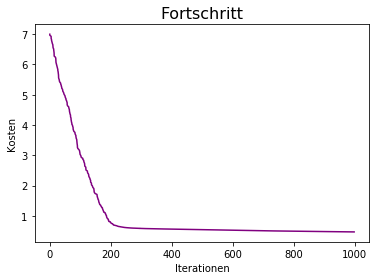

In [17]:
plot_progress(history_cost)
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])


In [18]:
theta_hist[-1]

array([ 1.01657715, -0.33873721, -0.50317618])

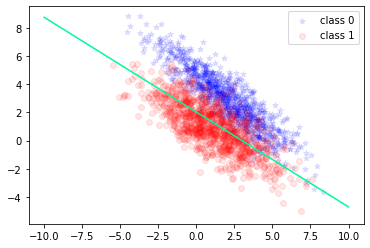

In [19]:

plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0", alpha ="0.1")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='o', label="class 1",alpha ="0.1")

x_vals = np.linspace(-10, 10, 100)
# w[1] * y = w[0] * x + b  ->  found on: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
# y_vals = -(x_vals * w_guess[0] + b_guess[0])/w_guess[1]
y_vals = -(theta_hist[-1][0] + x_vals *  theta_hist[-1][1]) / theta_hist[-1][2]
plt.plot(x_vals, y_vals, color = 'MediumSpringGreen')

plt.legend()

#### Accuracy

In [20]:
# Insert you code below
#print (y)
#print (logistic_hypothesis(theta_hist[-1])(X))
prediction = list(map(lambda x: 1 if x >= 0.5 else 0, logistic_hypothesis(theta_hist[-1])(X)))
correct_prediction = prediction == y
true_results = (correct_prediction == True).sum()
accuracy = true_results / len(prediction)
print ("True results: ", accuracy * 100, " %")

True results:  81.10000000000001  %
